Genera imágenes sintéticas

Autor: Eugenio Sánchez Úbeda - IIT | nov 2023

In [1]:
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split 
from matplotlib import font_manager
import matplotlib.pyplot as plt
import numpy as np
import os

c:\Users\euge.UPCONT\Miniconda3\envs\DL-TORCH\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# listado fonts instaladas en el ordenador
dir_fonts_windows = 'C:\\Windows\\Fonts\\'
if os.path.exists(dir_fonts_windows):
    print(f'El directorio {dir_fonts_windows} existe.')
else:
    print(f'El directorio {dir_fonts_windows} NO existe.')

system_fonts = font_manager.findSystemFonts(fontpaths = dir_fonts_windows, fontext='ttf')
print(system_fonts)

El directorio C:\Windows\Fonts\ existe.
['C:\\Windows\\Fonts\\CENSCBK.TTF', 'C:\\Windows\\Fonts\\cambriab.ttf', 'C:\\Windows\\Fonts\\GOTHICBI.TTF', 'C:\\Windows\\Fonts\\CENTURY.TTF', 'C:\\Windows\\Fonts\\seguibli.ttf', 'C:\\Windows\\Fonts\\FRABKIT.TTF', 'C:\\Windows\\Fonts\\GILC____.TTF', 'C:\\Windows\\Fonts\\corbel.ttf', 'C:\\Windows\\Fonts\\segoeui.ttf', 'C:\\Windows\\Fonts\\wingding.ttf', 'C:\\Windows\\Fonts\\segoeuib.ttf', 'C:\\Windows\\Fonts\\times.ttf', 'C:\\Windows\\Fonts\\BOD_BLAI.TTF', 'C:\\Windows\\Fonts\\corbelli.ttf', 'C:\\Windows\\Fonts\\GOUDOSI.TTF', 'C:\\Windows\\Fonts\\BRUSHSCI.TTF', 'C:\\Windows\\Fonts\\msyi.ttf', 'C:\\Windows\\Fonts\\SHOWG.TTF', 'C:\\Windows\\Fonts\\PERI____.TTF', 'C:\\Windows\\Fonts\\malgunsl.ttf', 'C:\\Windows\\Fonts\\PERB____.TTF', 'C:\\Windows\\Fonts\\LSANS.TTF', 'C:\\Windows\\Fonts\\mvboli.ttf', 'C:\\Windows\\Fonts\\constanz.ttf', 'C:\\Windows\\Fonts\\GOUDOSB.TTF', 'C:\\Windows\\Fonts\\trebucbi.ttf', 'C:\\Windows\\Fonts\\georgiaz.ttf', 'C:\\Windo

In [3]:
# Listado de fuentes que se utilizan (descartando símbolos)
fonts_list = ['YuGothL.ttc',
 'ERASLGHT.TTF',
 'segoeuii.ttf',
 'BOD_CB.TTF',
 'seguisbi.ttf',
 'BOD_BLAR.TTF',
 'BKANT.TTF',
 'LSANSI.TTF',
 'timesbd.ttf',
 'COOPBL.TTF',
 'segoepr.ttf',
 'BERNHC.TTF',
 'BAUHS93.TTF',
 'constani.ttf',
 'GOTHICI.TTF',
 #'SansSerifCollection.ttf',
 'NirmalaS.ttf',
 'PERTILI.TTF',
 'BOOKOSB.TTF',
 'consolaz.ttf',
 'ariblk.ttf',
 'MOD20.TTF',
 'BELLB.TTF',
 'mingliub.ttc',
 'couri.ttf',
 #'WINGDNG2.TTF',
 'CALIST.TTF',
 'seguisym.ttf',
 'REFSAN.TTF',
 'trebucbd.ttf',
 'BRLNSDB.TTF',
 'LSANS.TTF',
 'LSANSD.TTF',
 'verdanai.ttf',
 'VIVALDII.TTF',
 'GARABD.TTF',
 'ERASBD.TTF',
 'seguili.ttf',
 'LFAX.TTF',
 'consolab.ttf',
 'LSANSDI.TTF',
 'PRISTINA.TTF',
 'RAGE.TTF',
 'segoescb.ttf',
 'BRUSHSCI.TTF',
 'tahomabd.ttf',
 'sylfaen.ttf',
 'georgiaz.ttf',
 'comic.ttf',
 'CALISTBI.TTF',
 'malgunsl.ttf',
 'segoeuib.ttf',
 'GILSANUB.TTF',
 'PLAYBILL.TTF',
 'cambriai.ttf',
 'malgunbd.ttf',
 #'holomdl2.ttf',
 'ebrima.ttf',
 'BRLNSR.TTF',
 'framd.ttf',
 'taileb.ttf',
 'AGENCYR.TTF',
 'msyhbd.ttc',
 'msgothic.ttc',
 #'REFSPCL.TTF',
 'GOUDYSTO.TTF',
 #'PALSCRI.TTF',
 'seguihis.ttf',
 'FORTE.TTF',
 'simsun.ttc',
 'constan.ttf',
 'ELEPHNT.TTF',
 'GLSNECB.TTF',
 'ntailub.ttf',
 'CALISTB.TTF',
 'arialbd.ttf',
 'TCCEB.TTF',
 'FRAHVIT.TTF',
 'GILLUBCD.TTF',
 'trebucbi.ttf',
 'segoeui.ttf',
 'GLECB.TTF',
 'ANTQUAB.TTF',
 'PERB____.TTF',
 'SegUIVar.ttf',
 'LFAXDI.TTF',
 'verdanab.ttf',
 'CENSCBK.TTF',
 'AGENCYB.TTF',
 'LFAXI.TTF',
 'seguisli.ttf',
 #'ZWAdobeF.TTF',
 'LeelawUI.ttf',
 'CALISTI.TTF',
 'ntailu.ttf',
 'ROCKB.TTF',
 'YuGothB.ttc',
 'GILI____.TTF',
 'LBRITED.TTF',
 'BELL.TTF',
 'Gabriola.ttf',
 'GILC____.TTF',
 'OLDENGL.TTF',
 'framdit.ttf',
 'LTYPEO.TTF',
 'ERASDEMI.TTF',
 'BOOKOSI.TTF',
 'mvboli.ttf',
 #'PARCHM.TTF',
 'GOTHICBI.TTF',
 'micross.ttf',
 'georgiai.ttf',
 'ROCKBI.TTF',
 'FREESCPT.TTF',
 #'segmdl2.ttf',
 'JUICE___.TTF',
 'comici.ttf',
 'FRSCRIPT.TTF',
 'simsunb.ttf',
 'BOD_PSTC.TTF',
 'TCM_____.TTF',
 'palai.ttf',
 'CALIFI.TTF',
 'INFROMAN.TTF',
 'calibril.ttf',
 'RAVIE.TTF',
 'BRADHITC.TTF',
 'SCHLBKI.TTF',
 'SCRIPTBL.TTF',
 'ITCKRIST.TTF',
 'OCRAEXT.TTF',
 'GOTHICB.TTF',
 'BOD_CI.TTF',
 'tahoma.ttf',
 'CASTELAR.TTF',
 'consola.ttf',
 'palabi.ttf',
 'Nirmala.ttf',
 'verdana.ttf',
 'segoeuisl.ttf',
 'Candarali.ttf',
 'BRITANIC.TTF',
 'LBRITE.TTF',
 'VINERITC.TTF',
 'MAGNETOB.TTF',
 'msjhbd.ttc',
 'FRADMCN.TTF',
 'STENCIL.TTF',
 'cambriaz.ttf',
 'lucon.ttf',
 'arialbi.ttf',
 'ARLRDBD.TTF',
 'pala.ttf',
 'timesi.ttf',
 'JOKERMAN.TTF',
 'ALGER.TTF',
 'Candarab.ttf',
 'GOUDOS.TTF',
 'BOD_BI.TTF',
 'CENTAUR.TTF',
 'msjh.ttc',
 'PERI____.TTF',
 'corbel.ttf',
 'NIAGENG.TTF',
 'BOD_CR.TTF',
 'YuGothR.ttc',
 'HTOWERTI.TTF',
 'BOOKOS.TTF',
 'calibrib.ttf',
 'CALIFB.TTF',
 'Inkfree.ttf',
 'ROCC____.TTF',
 'seguibl.ttf',
 'seguibli.ttf',
 'mmrtext.ttf',
 'comicz.ttf',
 'CURLZ___.TTF',
 'HATTEN.TTF',
 'LeelUIsl.ttf',
 'phagspa.ttf',
 'ARIALN.TTF',
 'corbelz.ttf',
 'SitkaVF.ttf',
 'LTYPE.TTF',
 'FRAHV.TTF',
 'ANTQUAI.TTF',
 'COLONNA.TTF',
 'HARNGTON.TTF',
 'BOD_I.TTF',
 'corbelb.ttf',
 'arial.ttf',
 #'symbol.ttf',
 'calibrili.ttf',
 'georgiab.ttf',
 'YuGothM.ttc',
 'FRABK.TTF',
 'BASKVILL.TTF',
 'FRABKIT.TTF',
 'GIGI.TTF',
 'GARAIT.TTF',
 #'SegoeIcons.ttf',
 'bahnschrift.ttf',
 'courbd.ttf',
 'consolai.ttf',
 'corbeli.ttf',
 'GARA.TTF',
 'COPRGTB.TTF',
 'PER_____.TTF',
 'HARLOWSI.TTF',
 'msyh.ttc',
 'PERBI___.TTF',
 'mmrtextb.ttf',
 'FRAMDCN.TTF',
 'calibrii.ttf',
 'TEMPSITC.TTF',
 'msyi.ttf',
 'LBRITEI.TTF',
 'NirmalaB.ttf',
 'msyhl.ttc',
 'LBRITEDI.TTF',
 'NIAGSOL.TTF',
 'VLADIMIR.TTF',
 'seguiemj.ttf',
 'FRADM.TTF',
 'LeelaUIb.ttf',
 'TCMI____.TTF',
 'verdanaz.ttf',
 'ENGR.TTF',
 #'OUTLOOK.TTF',
 'COPRGTL.TTF',
 'Candarai.ttf',
 'taile.ttf',
 'comicbd.ttf',
 'Candaraz.ttf',
 'ITCEDSCR.TTF',
 'GIL_____.TTF',
 'GOUDOSB.TTF',
 'LCALLIG.TTF',
 'MATURASC.TTF',
 'segoeuiz.ttf',
 'GOUDOSI.TTF',
 'FTLTLT.TTF',
 'ROCKEB.TTF',
 'HTOWERT.TTF',
 'malgun.ttf',
 #'WINGDNG3.TTF',
 'segoeuil.ttf',
 'FELIXTI.TTF',
 'constanz.ttf',
 'TCBI____.TTF',
 'ANTQUABI.TTF',
 'BROADW.TTF',
 'palab.ttf',
 'LTYPEBO.TTF',
 'corbelli.ttf',
 'BOD_BLAI.TTF',
 'ROCCB___.TTF',
 'IMPRISHA.TTF',
 'ebrimabd.ttf',
 #'ITCBLKAD.TTF',
 'cambriab.ttf',
 'BOD_CBI.TTF',
 'BOOKOSBI.TTF',
 'courbi.ttf',
 'BOD_B.TTF',
 'cour.ttf',
 'cambria.ttc',
 'CENTURY.TTF',
 'l_10646.ttf',
 'BOD_R.TTF',
 'ARIALNI.TTF',
 'ariali.ttf',
 'CHILLER.TTF',
 'GOTHIC.TTF',
 'SHOWG.TTF',
 'LTYPEB.TTF',
 'impact.ttf',
 'LATINWD.TTF',
 'BRLNSB.TTF',
 'BELLI.TTF',
 'SNAP____.TTF',
 'SitkaVF-Italic.ttf',
 'trebucit.ttf',
 'ARIALNB.TTF',
 'TCCB____.TTF',
 'POORICH.TTF',
 'seguisb.ttf',
 'times.ttf',
 'GILB____.TTF',
 'ROCK.TTF',
 #'MTEXTRA.TTF',
 'FRADMIT.TTF',
 'calibriz.ttf',
 'javatext.ttf',
 'trebuc.ttf',
 'segoesc.ttf',
 'monbaiti.ttf',
 'corbell.ttf',
 'CALIFR.TTF',
 'msjhl.ttc',
 'segoeprb.ttf',
 'georgia.ttf',
 'SCHLBKB.TTF',
 'LFAXD.TTF',
 'Candaral.ttf',
 'PAPYRUS.TTF',
 #'KUNSTLER.TTF',
 'phagspab.ttf',
 'ONYX.TTF',
 #'wingding.ttf',
 'ELEPHNTI.TTF',
 #'webdings.ttf',
 #'marlett.ttf',
 'TCCM____.TTF',
 'Candara.ttf',
 'calibri.ttf',
 'ROCKI.TTF',
 'himalaya.ttf',
 'MISTRAL.TTF',
 'PERTIBD.TTF',
 'gadugi.ttf',
 'GILBI___.TTF',
 'ERASMD.TTF',
 'LHANDW.TTF',
 'MTCORSVA.TTF',
 'timesbi.ttf',
 'constanb.ttf',
 #'BSSYM7.TTF',
 'MAIAN.TTF',
 'ARIALNBI.TTF',
 'TCB_____.TTF',
 'gadugib.ttf',
 'SCHLBKBI.TTF']

In [4]:
# Separa las fuentes disponibles en dos grupos (TR y TS)
# de esta forma es más realista (TS representa lo que ocurrirá cuando se pruebe 
# con una fuente desconocida) 

p_test = 1/7 # Porcentaje de TS
fonts_list_tr, fonts_list_ts = train_test_split(fonts_list, test_size = p_test, random_state=999)

print(f'Número de fuentes diferentes: {len(fonts_list)}')
print(f'Número de fuentes diferentes para TR: {len(fonts_list_tr)}')
print(f'Número de fuentes diferentes para TS: {len(fonts_list_ts)}')

Número de fuentes diferentes: 314
Número de fuentes diferentes para TR: 269
Número de fuentes diferentes para TS: 45


In [5]:
# lista de dígitos y tamaños de fuente
digits_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
font_size_list = [15, 18, 20, 22, 25, 26, 28]
print(f'Se generarán {len(fonts_list)}*{len(font_size_list)} = {len(fonts_list)*len(font_size_list)} muestras para cada dígito.')

Se generarán 314*7 = 2198 muestras para cada dígito.


In [6]:
# Las imágenes se escriben dentro del directorio ESU23, en TR y TS
# dentro de cada subcarpeta TR y TS las imágenes están organizadas por
# categorías (0 contiene todas las imágenes de 0s, 1 las imágenes de 1s, etc)

print(f'Ruta actual: {os.getcwd()}')

dir_img = 'ESU23'
ruta_img = os.path.join(os.getcwd(), "data", dir_img)
if not os.path.exists(ruta_img):
   os.makedirs(ruta_img)
   print(f'Se crea {ruta_img}')

ruta_img_tr = os.path.join(ruta_img, "TR")
if not os.path.exists(ruta_img_tr):
   os.makedirs(ruta_img_tr)
   print(f'Se crea {ruta_img_tr}')

# cada dígito TR va en su carpeta concreta
for dig in digits_list:
   ruta_img_tr_dig = os.path.join(ruta_img_tr, dig)
   if not os.path.exists(ruta_img_tr_dig):
      os.makedirs(ruta_img_tr_dig)
      print(f'Se crea {ruta_img_tr_dig}')
   
ruta_img_ts = os.path.join(ruta_img, "TS")
if not os.path.exists(ruta_img_ts):
   os.makedirs(ruta_img_ts)
   print(f'Se crea {ruta_img_ts}')

# cada dígito TR va en su carpeta concreta
for dig in digits_list:
   ruta_img_ts_dig = os.path.join(ruta_img_ts, dig)
   if not os.path.exists(ruta_img_ts_dig):
      os.makedirs(ruta_img_ts_dig)
      print(f'Se crea {ruta_img_ts_dig}')

# listas para iterar
conj_tr_ts = [fonts_list_tr, fonts_list_ts]
rutas_conj_tr_ts = [ruta_img_tr,ruta_img_ts]

Ruta actual: c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR\0
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR\1
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR\2
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR\3
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR\4
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR\5
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LEARNING_catedraEndesa_nov2023\LAB\data\ESU23\TR\6
Se crea c:\uge\clases\seminarios\Webinar_DEEP_LE

Generando dígitos para la fuente "HTOWERT.TTF" ...


Generando dígitos para la fuente "Candarab.ttf" ...
Generando dígitos para la fuente "constanb.ttf" ...
Generando dígitos para la fuente "LTYPEBO.TTF" ...
Generando dígitos para la fuente "BOD_CI.TTF" ...
Generando dígitos para la fuente "ROCKI.TTF" ...
Generando dígitos para la fuente "ROCK.TTF" ...
Generando dígitos para la fuente "BOD_I.TTF" ...
Generando dígitos para la fuente "BRLNSDB.TTF" ...
Generando dígitos para la fuente "calibrii.ttf" ...
Generando dígitos para la fuente "LSANSI.TTF" ...
Generando dígitos para la fuente "ebrima.ttf" ...
Generando dígitos para la fuente "OLDENGL.TTF" ...
Generando dígitos para la fuente "YuGothL.ttc" ...
Generando dígitos para la fuente "NIAGSOL.TTF" ...
Generando dígitos para la fuente "BOD_R.TTF" ...
Generando dígitos para la fuente "BELL.TTF" ...
Generando dígitos para la fuente "JUICE___.TTF" ...
Generando dígitos para la fuente "BELLB.TTF" ...
Generando dígitos para la fuente "TCCM____.TTF" ...
Generando dígitos para la fuente "HARNGTON.

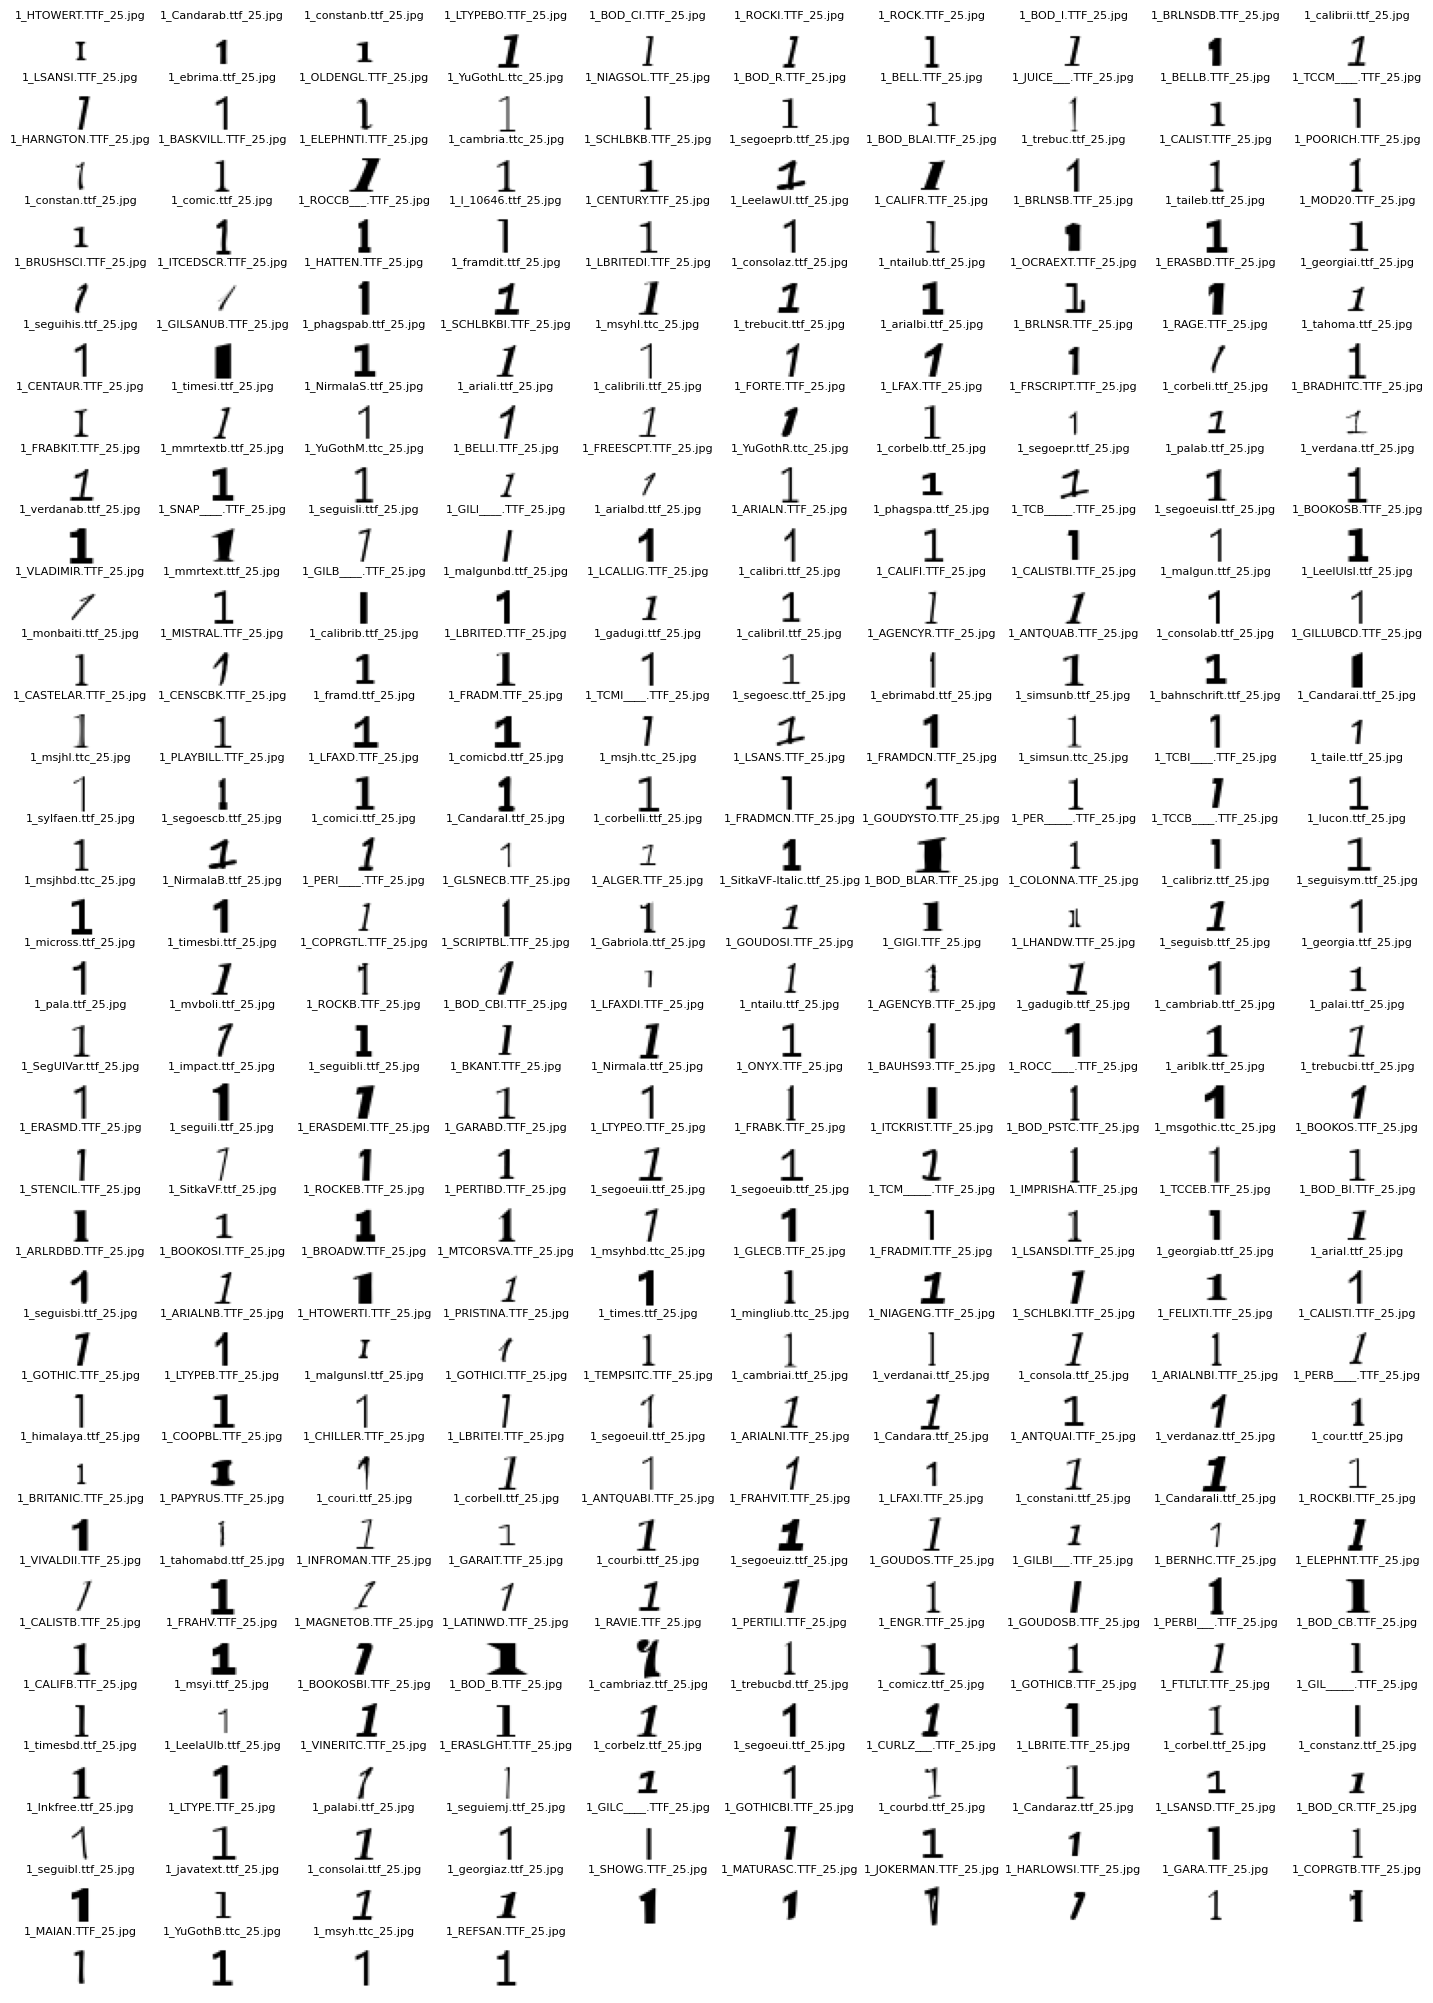

In [7]:
# Genera todas las imágenes y las guarda en su sitio
imgSize = (28,28)
negro, blanco = 0, 255

fig = plt.figure(1,figsize=(18, 40))
k=1
for lista_fuentes, ruta_conj in zip(conj_tr_ts,rutas_conj_tr_ts):
    
    for fu in lista_fuentes:
        nombre_fic_font_sys = f'{dir_fonts_windows}{fu}'
    
        if not os.path.exists(nombre_fic_font_sys):
            print(f'**  No se encuentra la fuente "{fu}" en la carpeta del sistema !')
        else:
            print(f'Generando dígitos para la fuente "{fu}" ...')

            for fs in font_size_list:
                # carga la fuente elegida
                font = ImageFont.truetype(nombre_fic_font_sys, fs)
            
                for dig in digits_list:
                    # crea una imagen en blanco vacía (solo tiene luminancia con un canal)
                    image = Image.new('L', imgSize, blanco)
                    draw = ImageDraw.Draw(image)

                    # traslada al centro de la imagen
                    [left, top, right, bottom] = font.getbbox(dig)
                    position = (14-(right+left)//2, 14-(bottom+top)//2)

                    # pinta el dígito y lo guarda como jpg
                    draw.text(position, dig, negro, font=font)
                    nom_fi_img = f'{dig}_{fu}_{fs}.jpg' 
                    
                    # cada dígito va en su carpeta concreta
                    ruta_fi_img = os.path.join(ruta_conj, dig, nom_fi_img)
                    image.save(ruta_fi_img)

                    # muestra ejemplo
                    if dig == '1' and fs ==25:
                        plt.subplot(50,10,k)
                        plt.imshow(image, cmap=plt.cm.gray)
                        plt.axis('off')
                        plt.title(nom_fi_img, fontdict={'size': 8})
                        k=k+1